In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import easygems.healpix as egh

/home/users/mmuetz/miniforge3/envs/hackathon_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
# 11 zoom levels available, 2D data only.
url = 'http://hackathon-o.s3.jc.rl.ac.uk/sim-data/DYAMOND3_example_data/5km-RAL3/2d/data.2d.z10.zarr'
# If outside JASMIN firewall:
# url = 'https://hackathon-o.s3-ext.jc.rl.ac.uk/sim-data/DYAMOND3_example_data/5km-RAL3/2d/data.2d.z10.zarr'

ds = xr.open_zarr(url)
ds

<xarray.Dataset> Size: 24TB
Dimensions:        (cell: 12582912, time: 9745, time_halfpast: 9744)
Coordinates:
  * cell           (cell) int64 101MB 0 1 2 3 ... 12582909 12582910 12582911
  * time           (time) datetime64[ns] 78kB 2020-01-20 ... 2021-03-01
  * time_halfpast  (time_halfpast) datetime64[ns] 78kB 2020-01-20T00:30:00 .....
Data variables: (12/24)
    clivi          (time, cell) float64 981GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    clt            (time, cell) float64 981GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    clwvi          (time, cell) float64 981GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    hflsd          (time, cell) float64 981GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    hfssd          (time, cell) float64 981GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    huss           (time, cell) float64 981GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    ...             ...
    rsut           (time, cell) float64 981GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    rsutcs         (time, cell) float64 981GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    tas            (time, cell) float64 981GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    ts             (time, cell) float64 981GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    uas            (time, cell) float64 981GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    vas            (time, cell) float64 981GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>

In [3]:
# Chunked by 1 in time dim and ncells / 12 in cell dim.
print(ds.tas.data.chunksize)

(1, 1048576)


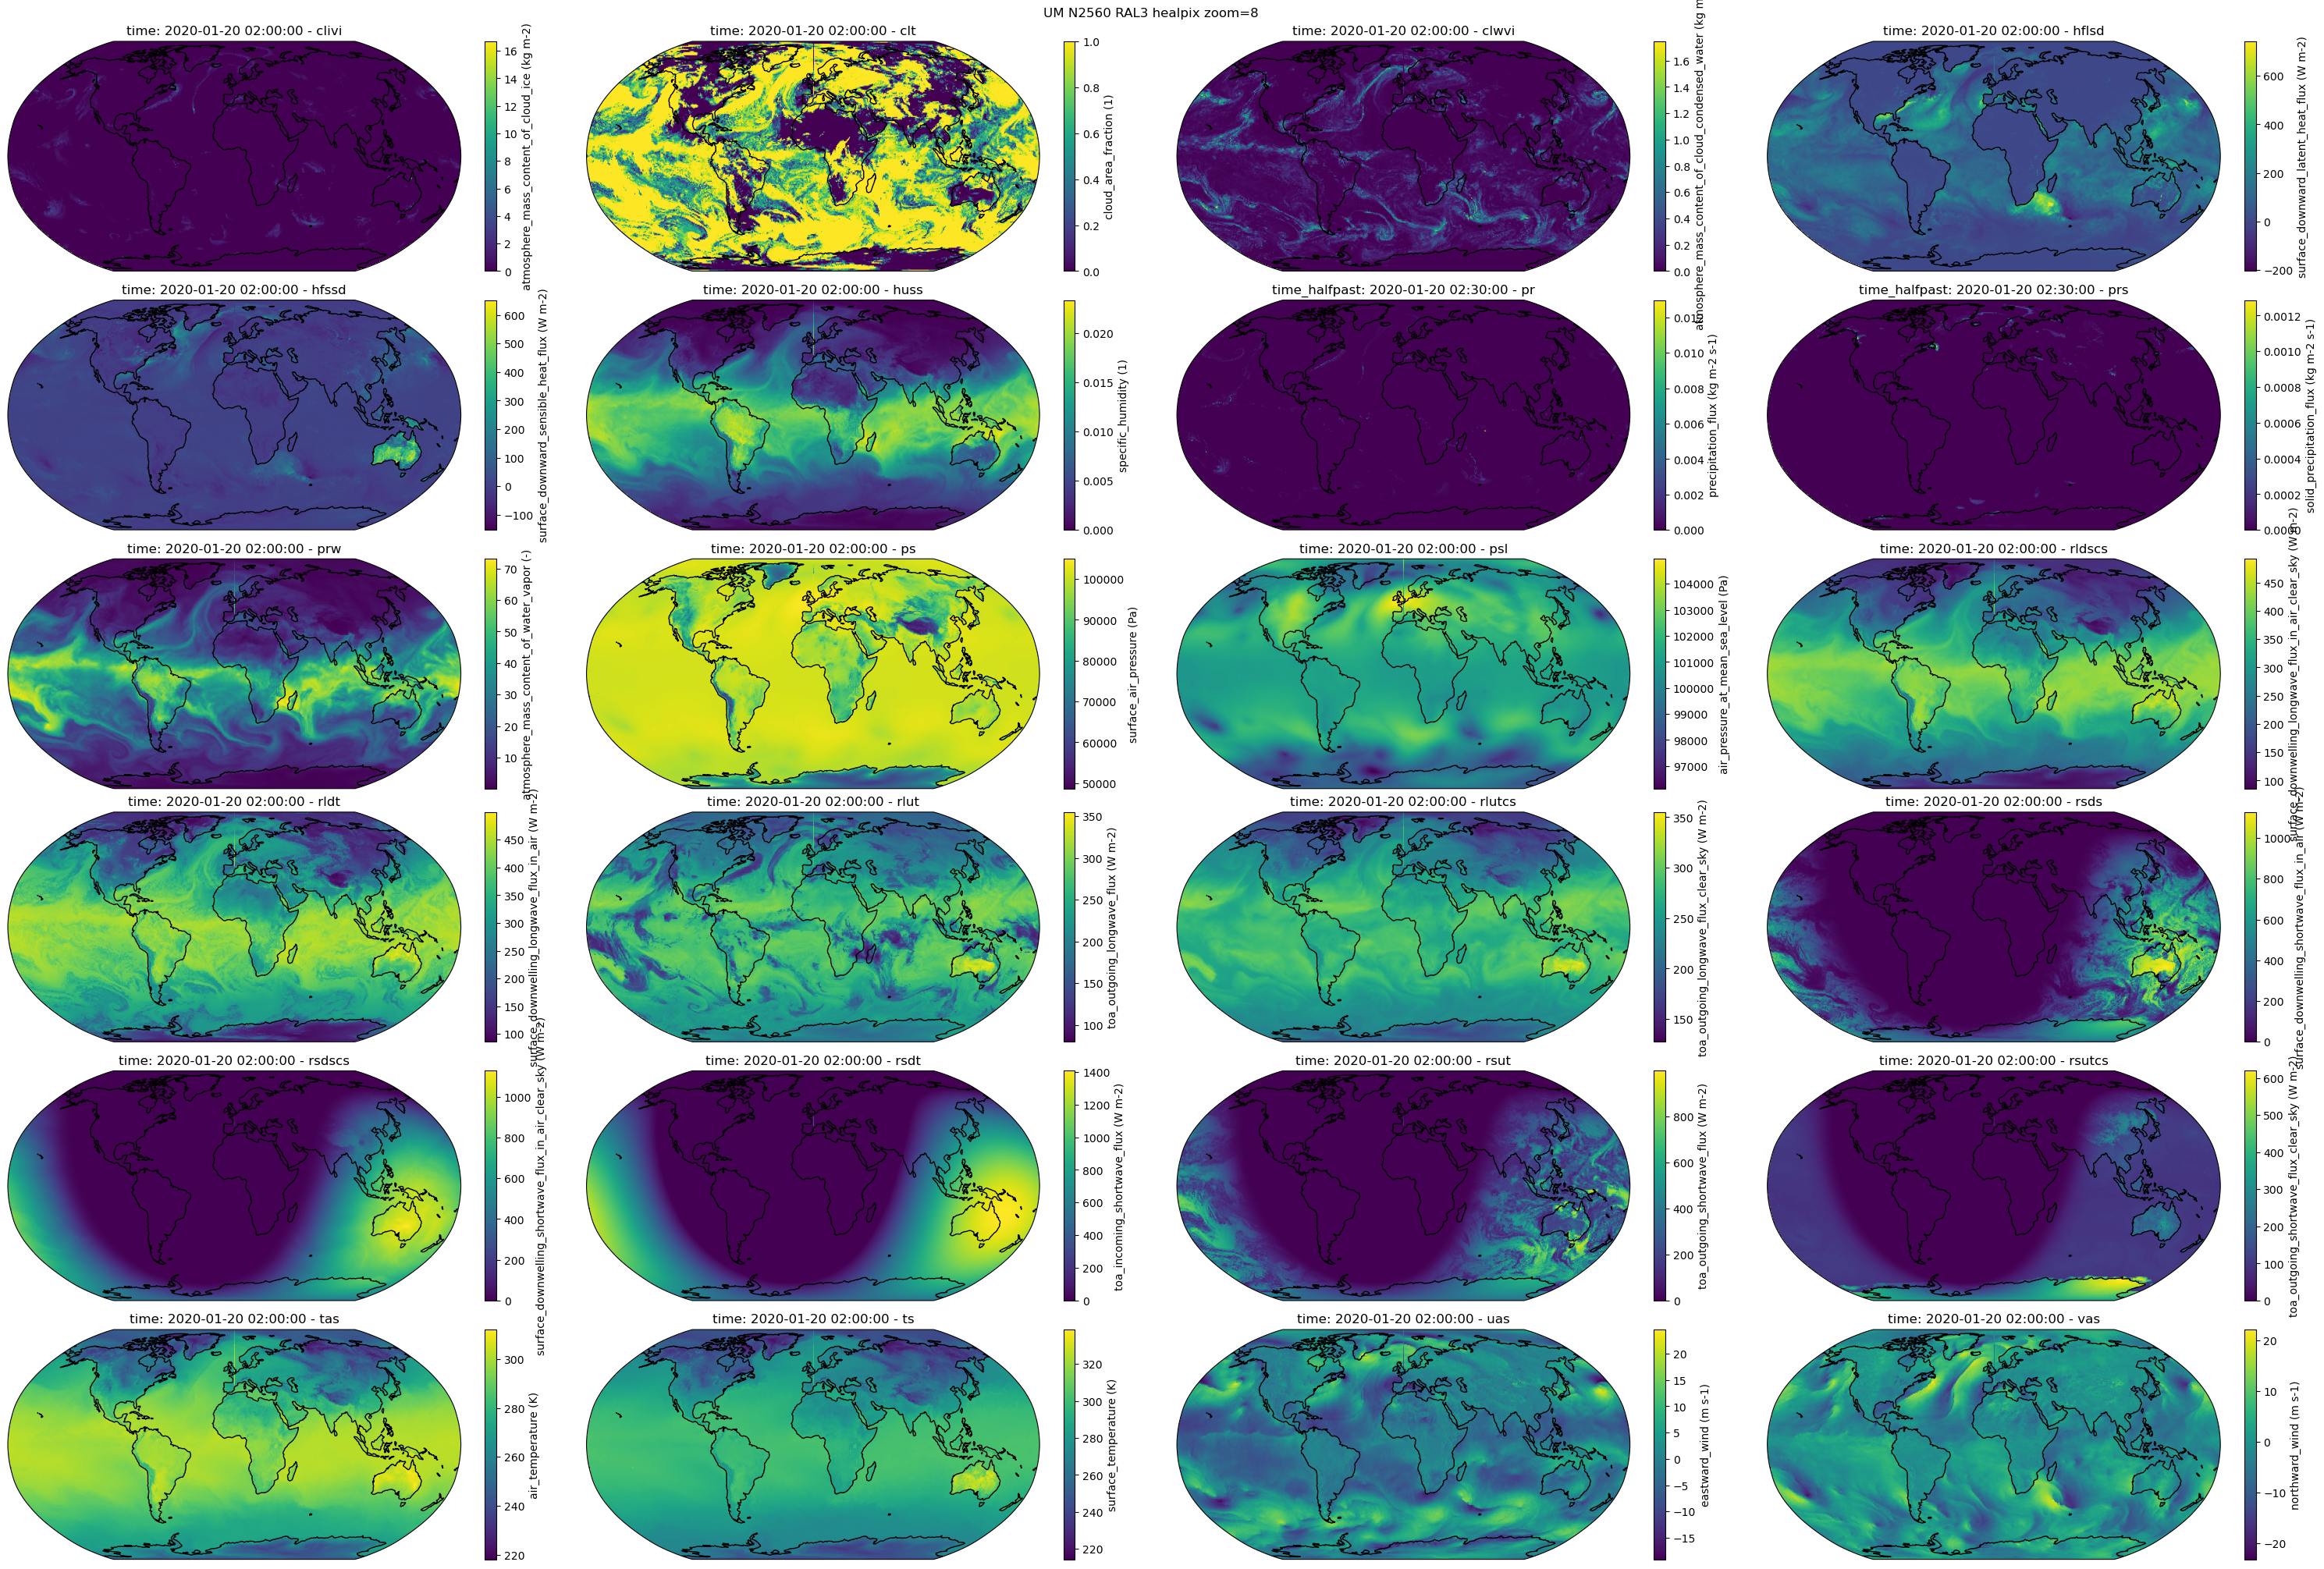

In [8]:
zoom = 8
time_idx = 2

url = f'http://hackathon-o.s3.jc.rl.ac.uk/sim-data/DYAMOND3_example_data/5km-RAL3/2d/data.2d.z{zoom}.zarr'
# If outside JASMIN firewall:
# url = f'https://hackathon-o.s3-ext.jc.rl.ac.uk/sim-data/DYAMOND3_example_data/5km-RAL3/2d/data.2d.z{zoom}.zarr'

ds_plot = xr.open_zarr(url)

projection = ccrs.Robinson(central_longitude=0)

fig, axes = plt.subplots(6, 4, figsize=(30, 20), subplot_kw={'projection': projection}, layout='constrained')
plt.suptitle(f'UM N2560 RAL3 healpix zoom={zoom}')

for ax, (name, da) in zip(axes.flatten(), ds_plot.data_vars.items()):
    timename = [c for c in da.coords if c.startswith('time')][0]
    time = pd.Timestamp(ds[timename].values[time_idx])

    data = da.isel(**{timename: time_idx})
    ax.set_title(f'{timename}: {time} - {name}')
    ax.set_global()
    im = egh.healpix_show(data.values, ax=ax);
    long_name = da.long_name
        
    plt.colorbar(im, label=f'{long_name} ({da.attrs.get("units", "-")})')
    ax.coastlines()

In [5]:
# Why do filled in times only go up to 2020-01-26 17:00???
# For a processing step to succeed and write its .done file, it has to think that it's written a full 12-h of data.
zoom = 5

url = f'http://hackathon-o.s3.jc.rl.ac.uk/sim-data/DYAMOND3_example_data/5km-RAL3/2d/data.2d.z{zoom}.zarr'
dsz = xr.open_zarr(url)
tas = dsz.tas.isel(time=slice(240)).mean(dim='cell').compute()
for time, T in zip(dsz.time.values[:240], tas.values):
    print(time, not np.isnan(T))

2020-01-20T00:00:00.000000000 True
2020-01-20T01:00:00.000000000 True
2020-01-20T02:00:00.000000000 True
2020-01-20T03:00:00.000000000 True
2020-01-20T04:00:00.000000000 True
2020-01-20T05:00:00.000000000 True
2020-01-20T06:00:00.000000000 True
2020-01-20T07:00:00.000000000 True
2020-01-20T08:00:00.000000000 True
2020-01-20T09:00:00.000000000 True
2020-01-20T10:00:00.000000000 True
2020-01-20T11:00:00.000000000 True
2020-01-20T12:00:00.000000000 True
2020-01-20T13:00:00.000000000 True
2020-01-20T14:00:00.000000000 True
2020-01-20T15:00:00.000000000 True
2020-01-20T16:00:00.000000000 True
2020-01-20T17:00:00.000000000 True
2020-01-20T18:00:00.000000000 True
2020-01-20T19:00:00.000000000 True
2020-01-20T20:00:00.000000000 True
2020-01-20T21:00:00.000000000 True
2020-01-20T22:00:00.000000000 True
2020-01-20T23:00:00.000000000 True
2020-01-21T00:00:00.000000000 True
2020-01-21T01:00:00.000000000 True
2020-01-21T02:00:00.000000000 True
2020-01-21T03:00:00.000000000 True
2020-01-21T04:00:00.

In [6]:
for short_name, long_name in sorted([(n, da.long_name) for n, da in ds.data_vars.items()], key=lambda x: x[1]):
    print(f'{ds[short_name].long_name},{short_name}')

air_pressure_at_mean_sea_level,psl
air_temperature,tas
atmosphere_mass_content_of_cloud_condensed_water,clwvi
atmosphere_mass_content_of_cloud_ice,clivi
atmosphere_mass_content_of_water_vapor,prw
cloud_area_fraction,clt
eastward_wind,uas
northward_wind,vas
precipitation_flux,pr
solid_precipitation_flux,prs
specific_humidity,huss
surface_air_pressure,ps
surface_downward_latent_heat_flux,hflsd
surface_downward_sensible_heat_flux,hfssd
surface_downwelling_longwave_flux_in_air,rldt
surface_downwelling_longwave_flux_in_air_clear_sky,rldscs
surface_downwelling_shortwave_flux_in_air,rsds
surface_downwelling_shortwave_flux_in_air_clear_sky,rsdscs
surface_temperature,ts
toa_incoming_shortwave_flux,rsdt
toa_outgoing_longwave_flux,rlut
toa_outgoing_longwave_flux_clear_sky,rlutcs
toa_outgoing_shortwave_flux,rsut
toa_outgoing_shortwave_flux_clear_sky,rsutcs
